# **SOAL**

Soal Research Questions
1. Dalam konteks bisnis dan ilmiah, apakah memprediksi nilai kesadahan (Hardness) air
tanah merupakan hal yang mendesak? Jelaskan urgensinya!
2. Apakah submisi Kaggle Anda mengalami overfit atau underfit? Jika iya, jelaskan
mengapa submisi tersebut Anda anggap sebagai overfit atau underfit serta jelaskan
bagaimana cara mengatasi hal tersebut! Jika tidak, jelaskan mengapa!
3. Jawablah pertanyaan-pertanyaan statistik berikut:
    - Berapa Hardness rata-rata dari sumber air yang memiliki kadar sodium di atas persentil 75 dan memiliki tingkat kebasaan (Alkalinity) di atas rata-rata?
    - Apakah ada sumber air yang memiliki tingkat kebasaan (Alkalinity) yang dapat dianggap outlier? Jelaskan!
4. Apakah ada hubungan antara Specific Conductivity dan Hardness? Jelaskan!
5. Dari zat-zat kimia yang diberikan, zat-zat apa saja yang paling mempengaruhi dan paling
tidak mempengaruhi Hardness? Jelaskan!
6. Apakah ada pasangan zat kimia yang berkorelasi tinggi? Apakah ada efek dari korelasi
tersebut?
7. Jelaskan fitur baru apa saja yang anda peroleh untuk membantu kemampuan model dalam
memprediksi ketika anda melalui proses feature engineering.
8. Jelaskan model yang Anda gunakan dalam memprediksi label Hardness! Mengapa Anda
menggunakan model tersebut?
9. Menurut Anda, apakah metrik penilaian R2
tepat? Jika tidak, metrik penilaian apa yang
menurut anda lebih tepat digunakan? Elaborasikan jawaban Anda!
10. Jika Anda boleh mengambil data dari sumber eksternal, data tentang apa yang Anda akan
ambil? Jelaskan mengapa data tersebut dapat membantu Anda memprediksi Hardness!

# **Libraries**

In [340]:
import warnings

# Menetapkan aturan untuk mengabaikan semua warning
warnings.filterwarnings("ignore")

from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import spearmanr
from scipy.stats import kendalltau

# Feature Engineering
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import RobustScaler
from scipy import stats
from scipy.stats import spearmanr

# **Import Data From Kaggle**

In [341]:
!kaggle competitions download -c seleksi-data-science-academy-compfest-16

seleksi-data-science-academy-compfest-16.zip: Skipping, found more recently modified local copy (use --force to force download)


In [342]:
with ZipFile('seleksi-data-science-academy-compfest-16.zip', 'r') as f:
    #extract in current directory
    f.extractall()

# **Data Loading**

In [343]:
df = pd.read_csv("train.csv")

In [344]:
df.head()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,510.0,23.2,240.0,90.4
1,1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,300.0,8.5,190.0,130.0
2,2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,370.0,25.0,230.0,160.0
3,3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,110.0,5.0,97.0,41.0
4,4,240.0,147.0,70.0,0.600,48.0,6.800,93.0,1410.0,418.0,950.0,586.0


In [345]:
print("Jumlah Kolom : ", df.shape[1])
print("Jumlah Baris : ", df.shape[0])

Jumlah Kolom :  12
Jumlah Baris :  6400


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6400 non-null   int64  
 1   Alkalinity, total       6400 non-null   float64
 2   Calcium                 6400 non-null   float64
 3   Chloride                6400 non-null   float64
 4   Fluoride                6400 non-null   float64
 5   Magnesium               6400 non-null   float64
 6   Nitrate as N            6400 non-null   float64
 7   Sodium                  6400 non-null   float64
 8   Specific Conductivity   6400 non-null   float64
 9   Sulfate                 6400 non-null   float64
 10  Total Dissolved Solids  6400 non-null   float64
 11  Hardness                6400 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 600.1 KB


Semua kolom tidak ada yang missing value

In [347]:
df.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,3199.500000,167.151047,69.350432,53.213620,0.333625,23.446335,3.382707,62.437731,637.631953,71.645934,409.570669,216.148203
std,1847.665193,83.157803,1052.136452,92.934505,0.452473,325.389503,4.878279,556.891904,597.297274,108.414049,302.958442,161.431526
min,0.000000,12.000000,0.610000,0.580000,0.049000,0.051000,0.002300,1.300000,40.000000,0.140000,19.580000,2.500000
25%,1599.750000,110.000000,25.000000,11.000000,0.140000,7.300000,0.850000,21.000000,340.000000,13.000000,220.000000,101.000000
50%,3199.500000,153.500000,45.000000,28.000000,0.210000,14.000000,2.000000,35.000000,520.000000,33.000000,320.000000,180.000000
75%,4799.250000,209.000000,72.000000,62.000000,0.382250,25.000000,4.300000,60.000000,800.000000,85.000000,500.000000,281.000000
max,6399.000000,1000.000000,83000.000000,2100.000000,9.000000,26000.000000,106.000000,32000.000000,31400.000000,2000.000000,4100.000000,1901.000000


# **EDA**

1. Bagaimana distribusi data masing masing fitur?
2. Apakah terdapat outlier?
3. Jawablah pertanyaan-pertanyaan statistik berikut:
    - Berapa Hardness rata-rata dari sumber air yang memiliki kadar sodium di atas persentil 75 dan memiliki tingkat kebasaan (Alkalinity) di atas rata-rata?
    - Apakah ada sumber air yang memiliki tingkat kebasaan (Alkalinity) yang dapat dianggap outlier? Jelaskan!
4. Bagaimana korelasi antar fitur?

## 1. Bagaimana distribusi data masing masing fitur?

In [348]:
highly_skewed = []
moderately_skewed = []
normal_skewed = []

# Perulangan untuk mengecek skewnes masing masing fitur 
for i in df.columns : 
    nilai_skew = df[i].skew() # Hitung skewness
    if nilai_skew < -1 or nilai_skew > 1 : # Jika skewnessnya lebih besar dari 1 atau lebih kecil -1
        highly_skewed.append(i)
    elif (nilai_skew >= -1 and nilai_skew <= -0.5) or (nilai_skew <= 1 and nilai_skew >= 0.5) :  # Jika skewnessnya di antara -1 dan -0.5 atau di antara 1 dan 0.5
        moderately_skewed.append(i)
    else : # Jika skewnessnya tidak memenuhi dua kondisi di atas
        normal_skewed.append(i)

In [349]:
for i in highly_skewed :
    print(i, end=", ")

Alkalinity, total, Calcium, Chloride, Fluoride, Magnesium, Nitrate as N, Sodium, Specific Conductivity, Sulfate, Total Dissolved Solids, Hardness, 

In [350]:
for i in moderately_skewed :
    print(i, end=", ")

In [351]:
for i in normal_skewed :
    print(i, end=", ")

id, 

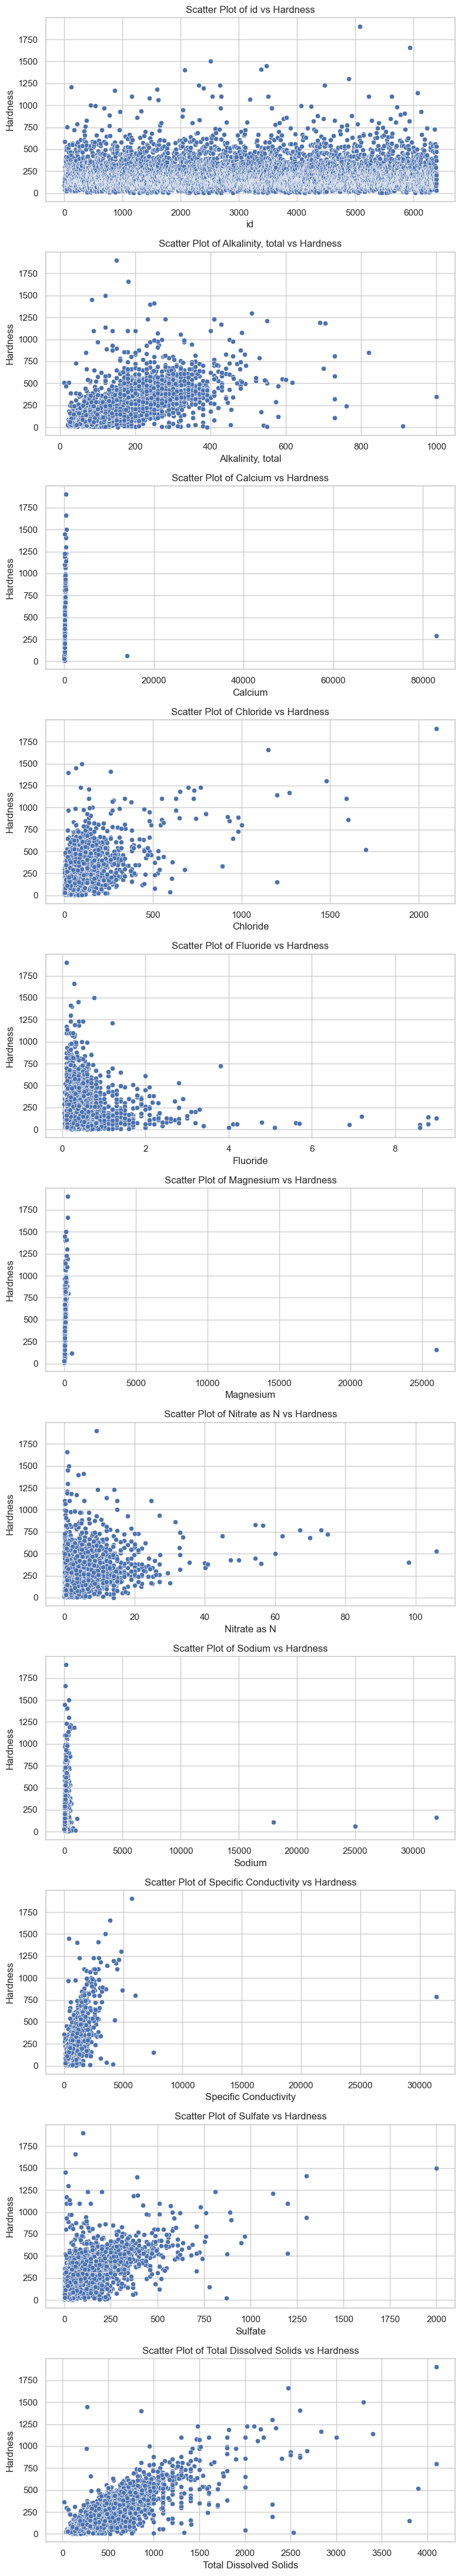

In [352]:
# Plot scatter plot untuk setiap fitur terhadap Hardness
features = df.columns[:-1]  # Mengambil semua kolom kecuali kolom 'Hardness'
hardness = 'Hardness'

fig, axes = plt.subplots(len(features), 1, figsize=(8, len(features) * 4))

for i, feature in enumerate(features):
    sns.scatterplot(ax=axes[i], x=df[feature], y=df[hardness])
    axes[i].set_title(f'Scatter Plot of {feature} vs {hardness}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(hardness)

plt.tight_layout()
plt.show()

**Kesimpulan :** Semua kolom memiliki distribusi tidak normal dengan nilai skew yang tinggi. Kolom id berdistribusi normal namun kolom ini tidak akan terpakai

## 2. Apakah terdapat outlier?

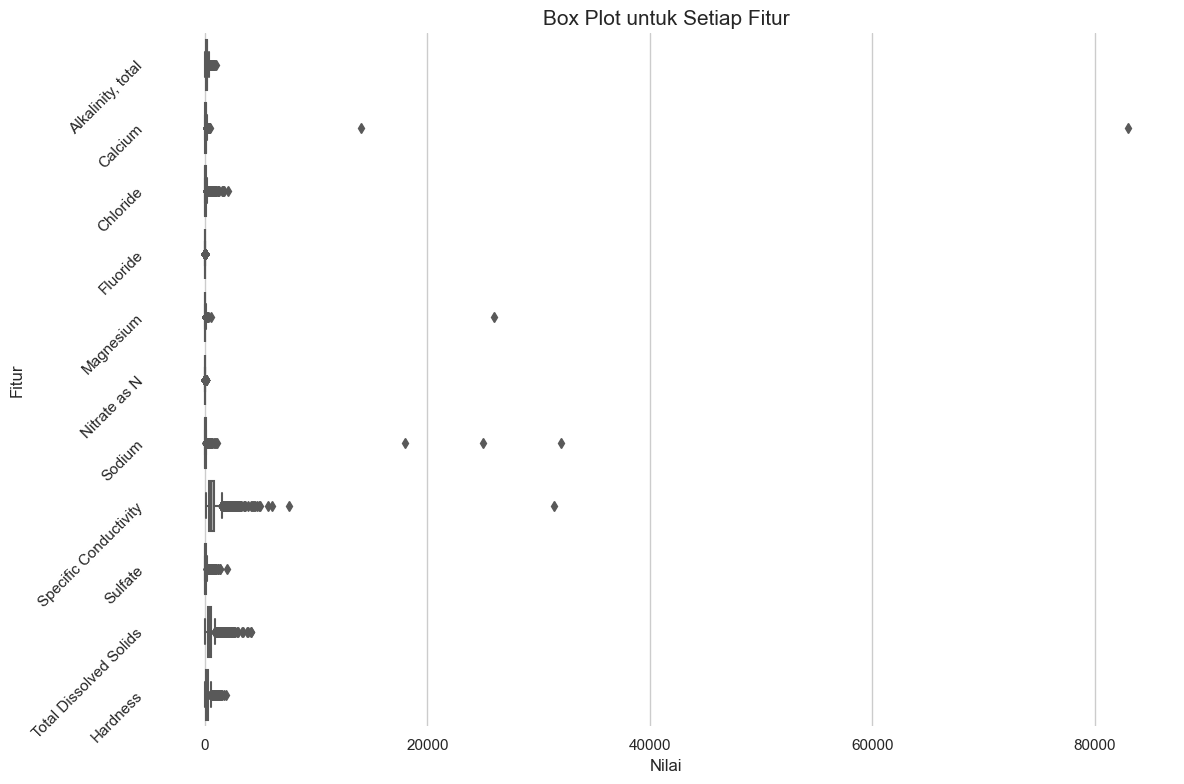

In [353]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
kolom = df.columns

# Set seaborn style
sns.set(style="whitegrid")

# Set up figure and axes
fig, axes = plt.subplots(figsize=(12, 8))

# Plot the box plot
sns.boxplot(data=df.drop(columns=kolom[0]), orient='h', ax=axes, palette='Set2')

# Set title and labels
axes.set_title('Box Plot untuk Setiap Fitur', fontsize=15, loc='center')
axes.set_ylabel('Fitur', fontsize=12)
axes.set_xlabel('Nilai', fontsize=12)

# Rotate y labels for better readability
axes.set_yticklabels(axes.get_yticklabels(), rotation=45, horizontalalignment='right')

# Remove top and right spines for a cleaner look
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


In [354]:
df['Specific Conductivity'].sort_values(ascending=False)

217     31400.0
6023     7530.0
1666     6000.0
5078     5700.0
3813     4910.0
         ...   
171        69.0
580        66.7
3172       62.0
3952       48.2
3364       40.0
Name: Specific Conductivity, Length: 6400, dtype: float64

**Insight :**
- Semua kolom memiliki outlier

## 3. Jawablah pertanyaan-pertanyaan statistik berikut:

### - Berapa Hardness rata-rata dari sumber air yang memiliki kadar sodium di atas persentil 75 dan memiliki tingkat kebasaan (Alkalinity) di atas rata-rata?

In [355]:
persentil_75 = df['Sodium'].quantile(0.75)
mean_kebasaan = df['Alkalinity, total'].mean()

df_h_mean = df[(df['Alkalinity, total'] > mean_kebasaan) & (df['Sodium'] > persentil_75)]
print("Hardness rata-rata dari sumber air yang memiliki kadar sodium di atas persentil 75 dan memiliki tingkat kebasaan (Alkalinity) \ndi atas rata-rata yaitu : ",df_h_mean['Hardness'].mean())

Hardness rata-rata dari sumber air yang memiliki kadar sodium di atas persentil 75 dan memiliki tingkat kebasaan (Alkalinity) 
di atas rata-rata yaitu :  383.0833134765625


### - Apakah ada sumber air yang memiliki tingkat kebasaan (Alkalinity) yang dapat dianggap outlier? Jelaskan!

## 4. Apakah ada hubungan antara Specific Conductivity dan Hardness? Jelaskan!

In [356]:
corr, _ = spearmanr(df['Hardness'], df["Specific Conductivity"])
print("Nilai korelasi Specific Conductivity dan Hardness : ",corr)

Nilai korelasi Specific Conductivity dan Hardness :  0.8384758509743198


In [357]:
df_tes = df[df['Specific Conductivity'] != 31400.00000]

<Axes: xlabel='Specific Conductivity', ylabel='Hardness'>

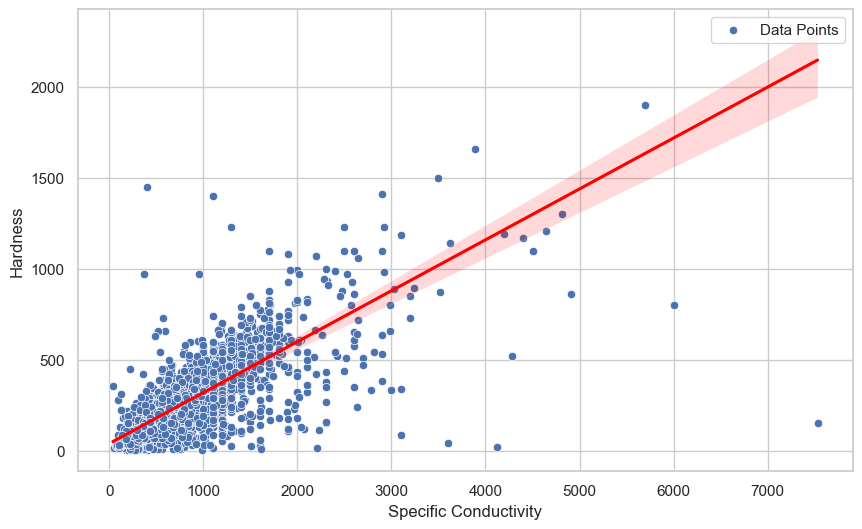

In [358]:
# Membuat scatter plot dengan garis regresi linear
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tes, x="Specific Conductivity", y="Hardness", label='Data Points')
sns.regplot(data=df_tes, x="Specific Conductivity", y="Hardness", scatter=False, color='red', label='Regresi Linear')

**Kesimpulan :** 
- Dikarenakan fitur fitur pada data memiliki outlier, maka kami menggunakan spearman untuk cek korelasi fitur `Specific Conductivity` dan `Hardness`. Hasilnya kedua fitur tersebut memiliki hubungan positif dengan nilai korelasi sebesar 0.84 yang artinya semakin tinggi nilai `Specific Conductivity` maka akan semakin tinggi pula nilai `Hardness`

## 5. Dari zat-zat kimia yang diberikan, zat-zat apa saja yang paling mempengaruhi dan paling tidak mempengaruhi Hardness? Jelaskan!

In [359]:
# Menghitung korelasi Spearman antara setiap kolom dan kolom 'Hardness'
correlations = {}
for column in df.columns:
    if column != 'Hardness':
        corr, _ = spearmanr(df['Hardness'], df[column])
        correlations[column] = corr

# Menampilkan hasil korelasi
for feature, corr in correlations.items():
    print(f'Korelasi antara Hardness dan {feature}: {corr:.2f}')



Korelasi antara Hardness dan id: -0.02
Korelasi antara Hardness dan Alkalinity, total: 0.76
Korelasi antara Hardness dan Calcium: 0.89
Korelasi antara Hardness dan Chloride: 0.61
Korelasi antara Hardness dan Fluoride: 0.16
Korelasi antara Hardness dan Magnesium: 0.85
Korelasi antara Hardness dan Nitrate as N: 0.30
Korelasi antara Hardness dan Sodium: 0.42
Korelasi antara Hardness dan Specific Conductivity: 0.84
Korelasi antara Hardness dan Sulfate: 0.71
Korelasi antara Hardness dan Total Dissolved Solids: 0.83


In [360]:
# Menghitung korelasi Spearman antara setiap kolom dan kolom 'Hardness'
correlations = {}
for column in df.columns:
    if column != 'Hardness':
        corr, _ = spearmanr(df['Hardness'], df[column])
        correlations[column] = corr

# Menampilkan hasil korelasi
for feature, corr in correlations.items():
    print(f'Korelasi antara Hardness dan {feature}: {corr:.2f}')



Korelasi antara Hardness dan id: -0.02
Korelasi antara Hardness dan Alkalinity, total: 0.76
Korelasi antara Hardness dan Calcium: 0.89
Korelasi antara Hardness dan Chloride: 0.61
Korelasi antara Hardness dan Fluoride: 0.16
Korelasi antara Hardness dan Magnesium: 0.85
Korelasi antara Hardness dan Nitrate as N: 0.30
Korelasi antara Hardness dan Sodium: 0.42
Korelasi antara Hardness dan Specific Conductivity: 0.84
Korelasi antara Hardness dan Sulfate: 0.71
Korelasi antara Hardness dan Total Dissolved Solids: 0.83


Dari hasil uji korelasi, kita dapat menentukan zat-zat kimia yang paling mempengaruhi dan paling tidak mempengaruhi `Hardness` berdasarkan nilai korelasi. Nilai korelasi berkisar antara -1 dan 1, di mana nilai yang mendekati 1 atau -1 menunjukkan hubungan yang kuat, sementara nilai yang mendekati 0 menunjukkan hubungan yang lemah atau tidak ada hubungan.

### **Zat-zat yang Paling Mempengaruhi `Hardness`:**
1. **Calcium (0.89)**: Ini menunjukkan korelasi positif yang sangat kuat antara `Calcium` dan `Hardness`. Ini berarti peningkatan kadar `Calcium` cenderung meningkatkan `Hardness`.
2. **Magnesium (0.85)**: Juga menunjukkan korelasi positif yang sangat kuat dengan `Hardness`, menunjukkan bahwa peningkatan kadar `Magnesium` cenderung meningkatkan `Hardness`.
3. **Specific Conductivity (0.84)**: Korelasi positif yang sangat kuat dengan `Hardness`, menunjukkan bahwa peningkatan `Specific Conductivity` berkaitan dengan peningkatan `Hardness`.
4. **Total Dissolved Solids (0.83)**: Menunjukkan korelasi positif yang sangat kuat, menunjukkan bahwa peningkatan `Total Dissolved Solids` berkaitan dengan peningkatan `Hardness`.
5. **Alkalinity, total (0.76)**: Menunjukkan korelasi positif yang kuat dengan `Hardness`, meskipun sedikit lebih rendah dibandingkan dengan empat zat di atas.
6. **Sulfate (0.71)**: Juga menunjukkan korelasi positif yang cukup kuat dengan `Hardness`.

### **Zat-zat yang Paling Tidak Mempengaruhi `Hardness`:**
1. **id (-0.02)**: Ini menunjukkan korelasi negatif yang sangat lemah (mendekati nol), yang berarti `id` hampir tidak memiliki hubungan dengan `Hardness`.
2. **Fluoride (0.16)**: Menunjukkan korelasi positif yang lemah dengan `Hardness`, menunjukkan bahwa perubahan pada `Fluoride` tidak banyak mempengaruhi `Hardness`.
3. **Nitrate as N (0.30)**: Menunjukkan korelasi positif yang lemah dengan `Hardness`, menunjukkan pengaruh yang relatif kecil dibandingkan zat-zat kimia lain yang lebih kuat.

### **Kesimpulan:**
- **Zat yang paling mempengaruhi `Hardness`** adalah `Calcium`, `Magnesium`, `Specific Conductivity`, `Total Dissolved Solids`, `Alkalinity, total`, dan `Sulfate`. Ini berarti perubahan pada kadar zat-zat ini akan memiliki dampak yang signifikan terhadap `Hardness`.
- **Zat yang paling tidak mempengaruhi `Hardness`** adalah `id`, `Fluoride`, dan `Nitrate as N`. Perubahan pada kadar zat-zat ini tidak akan banyak mempengaruhi `Hardness`.

Nilai korelasi yang tinggi menunjukkan bahwa `Hardness` terutama dipengaruhi oleh zat-zat yang memiliki ikatan ionik kuat, seperti `Calcium` dan `Magnesium`, yang merupakan konstituen utama dari kekerasan air.

## 6. Apakah ada pasangan zat kimia yang berkorelasi tinggi? Apakah ada efek dari korelasi tersebut?

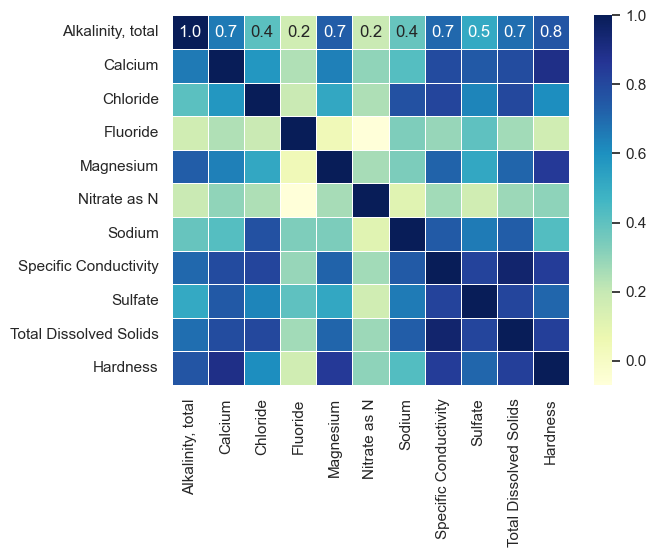

In [361]:
df_6 = df.drop(columns="id", axis=0)
# plotting correlation heatmap 
dataplot = sns.heatmap(df_6.corr(method="spearman"), cmap="YlGnBu", annot=True, fmt=".1f", linewidth=.7) 
  
# displaying heatmap 
plt.show() 

# **Feature Engineering**

## **Split Data**

In [362]:
df_6.corr(method="spearman")

,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
"Alkalinity, total",1.000000,0.658962,0.409466,0.167503,0.732905,0.188309,0.383432,0.706587,0.513990,0.687428,0.758763
Calcium,0.658962,1.000000,0.574355,0.239949,0.644674,0.299414,0.419512,0.794063,0.748452,0.789279,0.892554
Chloride,0.409466,0.574355,1.000000,0.188013,0.517640,0.247106,0.771076,0.811741,0.630441,0.801095,0.606693
Fluoride,0.167503,0.239949,0.188013,1.000000,0.041973,-0.070107,0.331682,0.285595,0.400936,0.264922,0.164161
Magnesium,0.732905,0.644674,0.517640,0.041973,1.000000,0.258684,0.335872,0.716092,0.518295,0.712270,0.847766
Nitrate as N,0.188309,0.299414,0.247106,-0.070107,0.258684,1.000000,0.112029,0.266018,0.167256,0.280587,0.304983
Sodium,0.383432,0.419512,0.771076,0.331682,0.335872,0.112029,1.000000,0.743456,0.654052,0.734129,0.424676
Specific Conductivity,0.706587,0.794063,0.811741,0.285595,0.716092,0.266018,0.743456,1.000000,0.817004,0.951120,0.838476
Sulfate,0.513990,0.748452,0.630441,0.400936,0.518295,0.167256,0.654052,0.817004,1.000000,0.809101,0.711235
Total Dissolved Solids,0.687428,0.789279,0.801095,0.264922,0.712270,0.280587,0.734129,0.951120,0.809101,1.000000,0.832212


In [412]:
selected_columns =  ['Calcium','Magnesium','Specific Conductivity']
X = df[selected_columns]
y = df['Hardness']
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.1,random_state=42)

In [364]:
X_train.shape

(4480, 3)

In [365]:
X_test.shape

(1920, 3)

In [413]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

## **Feature Creation**

## **Feature Extraction**

## **Feature Transformation**

### **Missing Value Handling**

### **Outlier Handling**

In [414]:
# Metode Capping untuk Distribusi Skew
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3,
                            variables=X.columns.to_list(),
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_skewed.fit_transform(X_train)
X_test_capped = winsorizer_skewed.transform(X_test)

In [368]:
# # Plot Distribution Comparison
# def outlier_handling_plot_comparison(df_before, df_after, variable):
#     """
#     This function is created to plot histograms and boxplots for a variable before and after outlier handling
    
#     Parameters:
#     - df_before (pandas.DataFrame): DataFrame before outlier handling
#     - df_after (pandas.DataFrame): DataFrame after outlier handling
#     - variable (str): The variable to plot
    
#     Example: 
#     num_cols = ['numeric_column']                                   <- Enter the numeric column
#     for col in num_cols:                                            <- make a for loop in numeric column to access every columns
#         plot_distribution_comparison(X_train, X_train_capped, col)  <- put X_train, X_train_capped, and columns in the variable

#     """
#     # Figure Size, and Super Title based on variable
#     fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
#     fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

#     # Plot Histogram Before
#     sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='skyblue')
#     axes[0, 0].set_title('Histogram Before')

#     # Plot Boxplot Before
#     sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='lightgreen')
#     axes[1, 0].set_title('Boxplot Before')

#     # Plot Histogram After
#     sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='skyblue')
#     axes[0, 1].set_title('Histogram After')

#     # Plot Boxplot After
#     sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='lightgreen')
#     axes[1, 1].set_title('Boxplot After')

#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#     plt.show()

In [369]:
# for col in X_train.columns.to_list():
#     outlier_handling_plot_comparison(X_train, X_train_capped, col)

### **Feature Scalling**

In [415]:
# Feature Scaling

scaler = RobustScaler()
scaler.fit(X_train_capped)

X_train_scaled = scaler.transform(X_train_capped)
X_test_scaled = scaler.transform(X_test_capped)

X_train_scaled

array([[ 2.65957447,  1.41242938,  2.56521739],
       [ 2.0212766 ,  2.20338983,  1.69565217],
       [-0.74468085, -0.58474576, -0.55434783],
       ...,
       [-0.42553191, -0.36723164, -0.32608696],
       [ 0.23404255,  0.05649718, -0.13043478],
       [-0.08510638, -0.35028249, -0.41304348]])

### **Feature Encoding**

## **Feature Selection**

# **Modelling**

## **LightGBM**

In [371]:
# Gabungkan X_train_scaled dan X_test_scaled
X_all = np.concatenate((X_train, X_test), axis=0)

# Gabungkan y_train dan y_test
y_all = np.concatenate((y_train, y_test), axis=0)

m

In [416]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

# Create and train the LightGBM Regressor model
model_lgbm = LGBMRegressor()
# model_lgbm = LGBMRegressor(
#     boosting_type='gbdt',
#     num_leaves=31,
#     max_depth=-1,
#     learning_rate=0.1,
#     n_estimators=100,
#     objective='regression'
# )
model_lgbm.fit(X_train_scaled, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 741
[LightGBM] [Info] Number of data points in the train set: 5760, number of used features: 3
[LightGBM] [Info] Start training from score 216.804476


LGBMRegressor()

In [386]:
from lightgbm import LGBMRegressor
import optuna
import numpy as np
from sklearn.metrics import r2_score

# Define objective function
def objective(trial):
    param = {
        'objective': 'regression',
        'metric': 'r2',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_uniform('feature_fraction', 0.01, 0.1),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 500),
        'n_estimators': trial.suggest_int('n_estimators', 1, 500),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 50),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 200),
        'max_depth': trial.suggest_int('max_depth', -1, 500)
    }

    # Train model
    model = LGBMRegressor.train(param, LGBMRegressor.Dataset(X_train_scaled, label=y_train))
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    ## Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    return r2

# Setup Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=600)

# Get best parameters
best_params = study.best_params
print("Best params:", best_params)


[I 2024-06-26 08:07:09,923] A new study created in memory with name: no-name-d9e3dccc-1674-426d-add4-efc39ea1ac95
[I 2024-06-26 08:07:10,047] Trial 0 finished with value: 0.9038318250419812 and parameters: {'feature_fraction': 0.09556546907501248, 'num_leaves': 261, 'n_estimators': 292, 'bagging_fraction': 0.6322959027607344, 'bagging_freq': 8, 'min_child_samples': 95, 'max_depth': 93}. Best is trial 0 with value: 0.9038318250419812.
[I 2024-06-26 08:07:10,202] Trial 1 finished with value: 0.8987710450356915 and parameters: {'feature_fraction': 0.04933237285804609, 'num_leaves': 431, 'n_estimators': 433, 'bagging_fraction': 0.766629608674325, 'bagging_freq': 41, 'min_child_samples': 135, 'max_depth': 269}. Best is trial 0 with value: 0.9038318250419812.
[I 2024-06-26 08:07:10,275] Trial 2 finished with value: 0.8865099500830235 and parameters: {'feature_fraction': 0.08938257058910042, 'num_leaves': 494, 'n_estimators': 263, 'bagging_fraction': 0.661032900498334, 'bagging_freq': 28, 'mi

Best params: {'feature_fraction': 0.09179295803196183, 'num_leaves': 24, 'n_estimators': 247, 'bagging_fraction': 0.9404416130670666, 'bagging_freq': 48, 'min_child_samples': 30, 'max_depth': 2}


In [434]:
import optuna
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import numpy as np

# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'regression',
        'metric': 'r2',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_uniform('feature_fraction', 0.01, 0.1),
        # 'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        # 'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 500),
        'n_estimators': trial.suggest_int('n_estimators', 1, 500),
        # 'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        # 'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        # 'bagging_freq': trial.suggest_int('bagging_freq', 1, 50),
        # 'min_child_samples': trial.suggest_int('min_child_samples', 1, 200),
        'max_depth': trial.suggest_int('max_depth', -1, 500)
    }
    model = LGBMRegressor(**param)
    score = cross_val_score(model, X_train_scaled, y_train, n_jobs=-1, cv=7, scoring='r2')
    return np.mean(score)

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=2200)

# Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)

# Train the final model with the best hyperparameters
best_params = study.best_params
model_lgbm = LGBMRegressor(**best_params)
model_lgbm.fit(X_train_scaled, y_train)

# Evaluate the final model
y_pred = model_lgbm.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f"Test R-squared: {r2}")


[I 2024-06-26 14:03:18,472] A new study created in memory with name: no-name-aebd8ec8-d486-47b7-b5f3-d1aefc72a702
[I 2024-06-26 14:03:28,389] Trial 0 finished with value: 0.8944035840075379 and parameters: {'feature_fraction': 0.028565190531919894, 'num_leaves': 168, 'n_estimators': 477, 'max_depth': 255}. Best is trial 0 with value: 0.8944035840075379.
[I 2024-06-26 14:03:34,982] Trial 1 finished with value: 0.8937024677067066 and parameters: {'feature_fraction': 0.053957985885113295, 'num_leaves': 498, 'n_estimators': 290, 'max_depth': 472}. Best is trial 0 with value: 0.8944035840075379.
[I 2024-06-26 14:03:39,289] Trial 2 finished with value: 0.898192251000771 and parameters: {'feature_fraction': 0.027623203608241623, 'num_leaves': 401, 'n_estimators': 308, 'max_depth': 63}. Best is trial 2 with value: 0.898192251000771.
[I 2024-06-26 14:03:39,737] Trial 3 finished with value: 0.8996775885120067 and parameters: {'feature_fraction': 0.07373570024037725, 'num_leaves': 20, 'n_estimato

KeyboardInterrupt: 

In [390]:
# model_lgbm = LGBMRegressor(**best_params, objective='regression', random_state=42)
model_lgbm = LGBMRegressor(**best_params)
# 0.9302
# model_lgbm = LGBMRegressor(lambda_l1= 4.211029167167098e-06, lambda_l2= 0.00013470847081493019, num_leaves= 2, 
#                            feature_fraction= 0.8617244960962868, bagging_fraction= 0.49239150482088606, bagging_freq= 20, min_child_samples= 24)
# # 0.9274
# model_lgbm = LGBMRegressor(lambda_l1= 1.6354976111389297, lambda_l2= 9.935757272539496, num_leaves= 13, 
#                            feature_fraction= 0.8941190047894602, bagging_fraction= 0.541706030730269, bagging_freq= 2, min_child_samples= 31)
# 0.9281
# model_lgbm = LGBMRegressor(lambda_l1= 4.839832024781913e-08, lambda_l2= 9.88615630906168, num_leaves= 15, 
#                            feature_fraction= 0.8889308180646281, bagging_fraction= 0.8872857285971145, bagging_freq= 6, min_child_samples= 44)
model_lgbm.fit(X_train_scaled, y_train)

[LightGBM] [Warning] feature_fraction is set=0.09179295803196183, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09179295803196183
[LightGBM] [Warning] bagging_fraction is set=0.9404416130670666, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9404416130670666
[LightGBM] [Warning] bagging_freq is set=48, subsample_freq=0 will be ignored. Current value: bagging_freq=48
[LightGBM] [Warning] feature_fraction is set=0.09179295803196183, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09179295803196183
[LightGBM] [Warning] bagging_fraction is set=0.9404416130670666, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9404416130670666
[LightGBM] [Warning] bagging_freq is set=48, subsample_freq=0 will be ignored. Current value: bagging_freq=48
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [

LGBMRegressor(bagging_fraction=0.9404416130670666, bagging_freq=48,
              feature_fraction=0.09179295803196183, max_depth=2,
              min_child_samples=30, n_estimators=247, num_leaves=24)

In [432]:
# Predict Train-Set and Test-Set

y_pred_train_lgbm = model_lgbm.predict(X_train_scaled)
y_pred_test_lgbm = model_lgbm.predict(X_test_scaled)

[LightGBM] [Warning] feature_fraction is set=0.0456307470428089, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.0456307470428089
[LightGBM] [Warning] feature_fraction is set=0.0456307470428089, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.0456307470428089


In [433]:
# Model evaluation using different metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE - Train Set  : ', mean_absolute_error(y_train, y_pred_train_lgbm))
print('MAE - Test Set   : ', mean_absolute_error(y_test, y_pred_test_lgbm))
print('')

print('MSE - Train Set  : ', mean_squared_error(y_train, y_pred_train_lgbm))
print('MSE - Test Set   : ', mean_squared_error(y_test, y_pred_test_lgbm))
print('')

print('RMSE - Train Set : ', mean_squared_error(y_train, y_pred_train_lgbm, squared=False))
print('RMSE - Test Set  : ', mean_squared_error(y_test, y_pred_test_lgbm, squared=False))
print('')

print('R2 Score - Train Set : ', r2_score(y_train, y_pred_train_lgbm))
print('R2 Score - Test Set  : ', r2_score(y_test, y_pred_test_lgbm))
print('')

MAE - Train Set  :  23.873193309084996
MAE - Test Set   :  25.38869875407246

MSE - Train Set  :  2385.746137775589
MSE - Test Set   :  2697.24464340317

RMSE - Train Set :  48.84410033745723
RMSE - Test Set  :  51.93500402814242

R2 Score - Train Set :  0.9089120500203809
R2 Score - Test Set  :  0.8912261224608928



In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

# Create and train the ExtraTreesRegressor model
model_extra_trees = ExtraTreesRegressor()

model_extra_trees.fit(X_all, y_all)
# Predict Train-Set and Test-Set

y_pred_train_extra = model_extra_trees.predict(X_train)
y_pred_test_extra = model_extra_trees.predict(X_test)

# Model evaluation using different metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE - Train Set  : ', mean_absolute_error(y_train, y_pred_train_extra))
print('MAE - Test Set   : ', mean_absolute_error(y_test, y_pred_test_extra))
print('')

print('MSE - Train Set  : ', mean_squared_error(y_train, y_pred_train_extra))
print('MSE - Test Set   : ', mean_squared_error(y_test, y_pred_test_extra))
print('')

print('RMSE - Train Set : ', mean_squared_error(y_train, y_pred_train_extra, squared=False))
print('RMSE - Test Set  : ', mean_squared_error(y_test, y_pred_test_extra, squared=False))
print('')

print('R2 Score - Train Set : ', r2_score(y_train, y_pred_train_extra))
print('R2 Score - Test Set  : ', r2_score(y_test, y_pred_test_extra))
print('')

MAE - Train Set  :  0.3279928819444505
MAE - Test Set   :  0.32627083333334206

MSE - Train Set  :  13.706336596122688
MSE - Test Set   :  9.643106616753474

RMSE - Train Set :  3.7022069899078693
RMSE - Test Set  :  3.1053351858943463

R2 Score - Train Set :  0.9995008658947017
R2 Score - Test Set  :  0.9995972551239868



In [ ]:
m

## **XGBoost**

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Buat dan latih model XGBoost Regressor
model_xgb = xgb.XGBRegressor(
    n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8
)
model_xgb.fit(X_train_scaled, y_train)

# Prediksi menggunakan model XGBoost Regressor
y_pred = model_xgb.predict(X_test_scaled)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 1921.95
R-squared: 0.92


In [ ]:
import optuna
import numpy as np
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define objective function
def objective(trial):
    param = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'verbosity': 0,
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'n_estimators': trial.suggest_int('n_estimators', 1, 2000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 10.0),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1.0),
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 10.0)
    }

    # Train model
    dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
    dtest = xgb.DMatrix(X_test_scaled, label=y_test)
    model = xgb.train(param, dtrain)

    # Predict
    y_pred = model.predict(dtest)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    return r2

# Setup Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1700)

# Get best parameters
best_params = study.best_params
print("Best params:", best_params)

# Train final model with best parameters
model_xgb = xgb.XGBRegressor(**best_params)
model_xgb.fit(X_train_scaled, y_train)

# Predict and evaluate final model
y_pred = model_xgb.predict(X_test_scaled)
final_r2 = r2_score(y_test, y_pred)
print(f"Final R-squared: {final_r2:.2f}")


[I 2024-06-25 11:28:09,059] A new study created in memory with name: no-name-2e8fd3ee-95a6-42f1-a71d-2a7e2d1c32ac
[I 2024-06-25 11:28:09,152] Trial 0 finished with value: 0.25140194397338955 and parameters: {'learning_rate': 0.016588549981541287, 'max_depth': 9, 'n_estimators': 1984, 'min_child_weight': 15, 'gamma': 0.0012983056008045069, 'subsample': 0.4217515229002189, 'colsample_bytree': 0.9604580306089276, 'lambda': 6.873495122039692e-05, 'alpha': 0.025433275496617842}. Best is trial 0 with value: 0.25140194397338955.
[I 2024-06-25 11:28:09,169] Trial 1 finished with value: 0.6591306818129316 and parameters: {'learning_rate': 0.07320899483657338, 'max_depth': 7, 'n_estimators': 813, 'min_child_weight': 17, 'gamma': 0.002101390775654512, 'subsample': 0.8749254553786082, 'colsample_bytree': 0.34840715569777775, 'lambda': 1.0453939120813704, 'alpha': 0.15392323742468098}. Best is trial 1 with value: 0.6591306818129316.
[I 2024-06-25 11:28:09,194] Trial 2 finished with value: 0.1962318

Best params: {'learning_rate': 0.36049826882015945, 'max_depth': 4, 'n_estimators': 1526, 'min_child_weight': 20, 'gamma': 0.5967303677085988, 'subsample': 0.34960743622952195, 'colsample_bytree': 0.39329327698197625, 'lambda': 3.1772393169212484e-08, 'alpha': 0.009450669953105431}
Final R-squared: 0.91


In [ ]:
# Predict Train-Set and Test-Set

y_pred_train_xgboost = model_xgb.predict(X_train_scaled)
y_pred_test_xgboost = model_xgb.predict(X_test_scaled)

In [ ]:
# Model evaluation using different metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE - Train Set  : ', mean_absolute_error(y_train, y_pred_train_xgboost))
print('MAE - Test Set   : ', mean_absolute_error(y_test, y_pred_test_xgboost))
print('')

print('MSE - Train Set  : ', mean_squared_error(y_train, y_pred_train_xgboost))
print('MSE - Test Set   : ', mean_squared_error(y_test, y_pred_test_xgboost))
print('')

print('RMSE - Train Set : ', mean_squared_error(y_train, y_pred_train_xgboost, squared=False))
print('RMSE - Test Set  : ', mean_squared_error(y_test, y_pred_test_xgboost, squared=False))
print('')

print('R2 Score - Train Set : ', r2_score(y_train, y_pred_train_xgboost))
print('R2 Score - Test Set  : ', r2_score(y_test, y_pred_test_xgboost))
print('')

MAE - Train Set  :  1.9558129729636016
MAE - Test Set   :  25.54945488374382

MSE - Train Set  :  25.084829463758084
MSE - Test Set   :  1921.9522370493419

RMSE - Train Set :  5.008475762520778
RMSE - Test Set  :  43.84007569620908

R2 Score - Train Set :  0.999056698737913
R2 Score - Test Set  :  0.9196159949296763



## **SVR**

In [ ]:
import optuna
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score

def objective(trial):
    param = {
        'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf']),
        'C': trial.suggest_loguniform('C', 1e-2, 100),
        'epsilon': trial.suggest_loguniform('epsilon', 1e-2, 10.0),
        'gamma': trial.suggest_categorical('gamma', ['auto', 'scale'])  # for 'rbf' kernel
    }

    # Train model
    model = SVR(**param)
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    ## Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    return r2

# Setup Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=700)

# Get best parameters
best_params = study.best_params
print("Best params:", best_params)


[I 2024-06-25 18:25:24,767] A new study created in memory with name: no-name-a2c11752-0620-464e-ba9f-57e734ddece7
[I 2024-06-25 18:25:26,047] Trial 0 finished with value: 0.1542332076077415 and parameters: {'kernel': 'rbf', 'C': 0.03411189442899008, 'epsilon': 0.22213340871469972, 'gamma': 'scale'}. Best is trial 0 with value: 0.1542332076077415.
[I 2024-06-25 18:25:27,240] Trial 1 finished with value: 0.028630469878148213 and parameters: {'kernel': 'rbf', 'C': 0.01302119561050281, 'epsilon': 9.031696031468336, 'gamma': 'auto'}. Best is trial 0 with value: 0.1542332076077415.
[I 2024-06-25 18:25:27,891] Trial 2 finished with value: 0.8772133238325958 and parameters: {'kernel': 'linear', 'C': 0.037409207715211286, 'epsilon': 4.872247077252645, 'gamma': 'auto'}. Best is trial 2 with value: 0.8772133238325958.
[I 2024-06-25 18:25:29,105] Trial 3 finished with value: 0.9046191683080022 and parameters: {'kernel': 'rbf', 'C': 47.82717750702077, 'epsilon': 1.2036823975575155, 'gamma': 'scale'

Best params: {'kernel': 'linear', 'C': 0.4712632488214231, 'epsilon': 8.092427854053124, 'gamma': 'scale'}


In [ ]:
from sklearn.svm import SVR

# model_svr = SVR(kernel= 'rbf', C= 999.5027321872781, epsilon= 0.005108446815028558, gamma= 'auto')  # 'rbf' is a common kernel for non-linear SVR
# model_svr = SVR(kernel= 'rbf', C= 988.3658326218767, epsilon= 9.99703362882495, gamma= 'scale')  # 'rbf' is a common kernel for non-linear SVR
model_svr = SVR(**best_params)  # 'rbf' is a common kernel for non-linear SVR
model_svr.fit(X_train_scaled, y_train)

SVR(C=0.4712632488214231, epsilon=8.092427854053124, kernel='linear')

In [ ]:
# Predict Train-Set and Test-Set

y_pred_train_svr = model_svr.predict(X_train_scaled)
y_pred_test_svr = model_svr.predict(X_test_scaled)

In [ ]:
# Model evaluation using different metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE - Train Set  : ', mean_absolute_error(y_train, y_pred_train_svr))
print('MAE - Test Set   : ', mean_absolute_error(y_test, y_pred_test_svr))
print('')

print('MSE - Train Set  : ', mean_squared_error(y_train, y_pred_train_svr))
print('MSE - Test Set   : ', mean_squared_error(y_test, y_pred_test_svr))
print('')

print('RMSE - Train Set : ', mean_squared_error(y_train, y_pred_train_svr, squared=False))
print('RMSE - Test Set  : ', mean_squared_error(y_test, y_pred_test_svr, squared=False))
print('')

print('R2 Score - Train Set : ', r2_score(y_train, y_pred_train_svr))
print('R2 Score - Test Set  : ', r2_score(y_test, y_pred_test_svr))
print('')

MAE - Train Set  :  22.087689139375225
MAE - Test Set   :  21.630994317372945

MSE - Train Set  :  3276.068443323357
MSE - Test Set   :  1914.6334985003025

RMSE - Train Set :  57.23694998271097
RMSE - Test Set  :  43.756525210536346

R2 Score - Train Set :  0.876805241919814
R2 Score - Test Set  :  0.9199220948968313



# PREDIK

In [ ]:
# sample = pd.read_csv("sample_submission.csv")
# sample

In [ ]:
df_predik = pd.read_csv("test.csv")
df_predik

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids
0,6400,93.0,15.9,3.6,0.100,11.90,1.400,12.7,208.0,6.5,156.0
1,6401,180.0,34.0,200.0,1.900,8.20,1.300,300.0,1700.0,210.0,860.0
2,6402,95.0,44.0,35.0,0.081,3.30,1.100,28.0,390.0,22.0,240.0
3,6403,110.0,29.0,12.0,0.250,6.00,0.150,23.0,283.0,15.0,190.0
4,6404,179.0,59.0,51.7,0.160,45.00,4.100,64.0,976.0,170.0,430.0
...,...,...,...,...,...,...,...,...,...,...,...
1596,7996,88.0,30.0,11.0,0.170,3.20,1.217,24.0,289.0,22.0,140.0
1597,7997,64.0,21.0,18.0,0.050,0.68,4.700,31.0,327.0,28.0,160.0
1598,7998,210.0,32.0,53.0,0.150,24.00,0.120,68.0,570.0,25.0,670.0
1599,7999,230.0,82.0,14.0,0.100,9.00,2.000,19.0,580.0,24.0,310.0


In [ ]:
df_predik = df_predik[selected_columns]

In [ ]:
df_predik = winsorizer_skewed.transform(df_predik)

In [ ]:
df_predik = scaler.transform(df_predik)

In [ ]:
df_predik

array([[-2.07810466, -0.2025662 , -0.11845558, -0.03370293,  0.39678888,
        -0.16636744],
       [ 3.23641962, -1.55708761,  2.31508164,  1.12005968, -0.02318825,
         1.57549441],
       [-1.45509652, -0.43055806,  0.48681559,  0.10133078, -0.26714163,
        -0.25738789],
       ...,
       [ 0.11693294, -0.68004258, -0.56326069,  0.84867142,  0.05723306,
         0.18047849],
       [-0.54229786, -0.05212198, -0.65844729, -0.1218919 , -1.12123443,
        -0.14717693],
       [-1.19330772, -0.3373757 , -1.2161966 ,  0.42161593,  0.63633844,
         0.03465343]])

In [ ]:
y_hasil = model_extra_trees.predict(df_predik)

In [ ]:
selected_columns

['Alkalinity, total',
 'Calcium',
 'Chloride',
 'Magnesium',
 'Nitrate as N',
 'Specific Conductivity',
 'Sulfate',
 'Total Dissolved Solids']

In [ ]:
id = pd.read_csv("test.csv")
id = id['id'].to_list()

In [ ]:
hasil_akhir = pd.DataFrame({"id":id, "Hardness":y_hasil.tolist()})

In [ ]:
hasil_akhir

,id,Hardness
0,6400,88.813654
1,6401,119.644241
2,6402,119.838900
3,6403,95.399771
4,6404,327.785785
...,...,...
1596,7996,89.397177
1597,7997,52.809245
1598,7998,185.210469
1599,7999,237.143649


In [ ]:
hasil_akhir.to_csv("bismillah.csv", index=False)